Jupyter Notebook to Look at SMP Data

Import libraries

In [1]:
# Import the connection function from the snowexsql library
from snowexsql.db import get_db

# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@52.32.183.144/snowex'

# Using the function get_db, we receive 2 ways to interact with the database
engine, session = get_db(db_name)

In [2]:
# Import the layer table which is where SMP data lives
from snowexsql.data import LayerData

# Import our convenient tool to convert to geopandas dataframes
from snowexsql.conversions import query_to_geopandas

# A little matplotlib biz if you want to plot multiple plots in a loop
import matplotlib.pyplot as plt 

# import geopandas lib to make a brand new GeoDataFrame to store your final results
import geopandas as gpd 

Find some SMP filenames

In [3]:
# use this while testing queries. It helps avoid little database errors that sometimes happen when a query fails.
session.rollback()

# Get profile file names which live in the comments of smp data. 
result = session.query(LayerData.comments, LayerData.site_id).distinct().limit(10).all()

filename = []
# Parse the filename strings from our results
#print(result)
for r in result:
     info = r[0] # Retrieve it from the tuple
     print(info)
     #info.split(',') # Split the string on commas
     #Extract the filename and store it in the filenames list 

None
graupel layer
fname = SNEX20_SMP_S19M1266_2S16_20200208.CSV, serial no. = 19
fname = SNEX20_SMP_S19M0911_1S8_20200201.CSV, serial no. = 19
Battered from wind (wind crust)
fname = SNEX20_SMP_S19M0872_5C21_20200130.CSV, serial no. = 19
fname = SNEX20_SMP_S06M0617_2N4_20200128.CSV, serial no. = 06
fname = SNEX20_SMP_S19M0748_3N22_20200128.CSV, serial no. = 19
fname = SNEX20_SMP_S06M0618_2N4_20200128.CSV, serial no. = 06
Graupel layer surrounded by rounds (RG)


Generate some data frames to store the data

In [4]:
final_df = gpd.GeoDataFrame(columns = ['med_force','geom'])
to_add_df = gpd.GeoDataFrame(columns = ['med_force','geom'])
#print(final_df)

Plot the raw data for one of the files

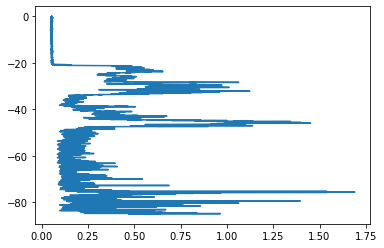

In [5]:
filenames = ['SNEX20_SMP_S19M1266_2S16_20200208.CSV']

for f in filenames:
    # Grab any layer data that has the file name in its comments
    qry = session.query(LayerData).filter(LayerData.comments.contains(f)).order_by('depth')

    # build a geopandas dataframe from the query
    df = query_to_geopandas(qry, engine)

    # Everything in the layers table is a string so we need to cast our value column as a float to calc stats on it
    df['value'] = df['value'].astype(float)

    # plot biz plot the profile vertically.
    fig, axes = plt.subplots(1)
    axes.plot(df['value'], df['depth'])

Manually input the snow surface and ground values

In [6]:
surface = -21
ground = -90

Find the median between the surface and ground, plot the filtered data, and add data to the data frame

0.238
   med_force                            geom
0      0.238  POINT (743905.753 4322634.104)


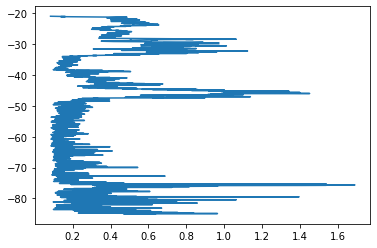

In [7]:
#Threshold for surface and ground
ind =  (df['depth'] < surface) & (df['depth'] > ground)

# Print out a stat
median = df[ind]['value'].median()
print(median)

# plot biz plot the profile vertically.
fig, axes = plt.subplots(1)
axes.plot(df[ind]['value'], df[ind]['depth'])

# add median force and location to a dataframe
final_df['geom'] = df['geom'].unique() # Which should only be one location
final_df['med_force'] = df[ind]['value'].median()    
print(final_df)

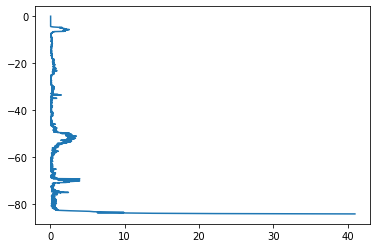

In [8]:
filenames = ['SNEX20_SMP_S19M0911_1S8_20200201.CSV']

for f in filenames:
    # Grab any layer data that has the file name in its comments
    qry = session.query(LayerData).filter(LayerData.comments.contains(f)).order_by('depth')

    # build a geopandas dataframe from the query
    df = query_to_geopandas(qry, engine)

    # Everything in the layers table is a string so we need to cast our value column as a float to calc stats on it
    df['value'] = df['value'].astype(float)

    # plot biz plot the profile vertically.
    fig, axes = plt.subplots(1)
    axes.plot(df['value'], df['depth'])

Manually input the snow surface and ground values

In [9]:
surface = -3
ground = -82

Find the median between the surface and ground, plot the filtered data, and store data to the data frame

0.26
   med_force                            geom
0       0.26  POINT (742606.052 4322880.455)


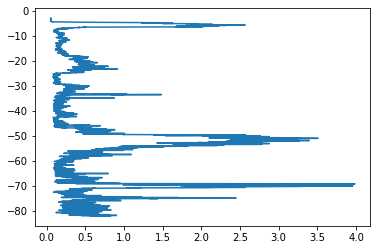

In [10]:
#Threshold for surface and ground
ind =  (df['depth'] < surface) & (df['depth'] > ground)

# Print out a stat
median = df[ind]['value'].median()
print(median)

# plot biz plot the profile vertically.
fig, axes = plt.subplots(1)
axes.plot(df[ind]['value'], df[ind]['depth'])

# add median force and location to a dataframe
to_add_df['geom'] = df['geom'].unique() # Which should only be one location
to_add_df['med_force'] = median
print(to_add_df)

In [11]:
final_df = final_df.append(to_add_df)
print(final_df)

   med_force                            geom
0      0.238  POINT (743905.753 4322634.104)
0      0.260  POINT (742606.052 4322880.455)


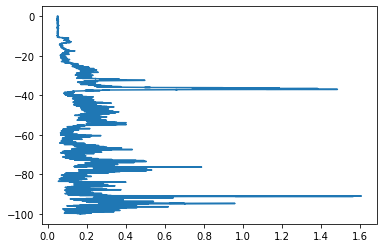

In [12]:
filenames = ['SNEX20_SMP_S19M0872_5C21_20200130.CSV']

for f in filenames:
    # Grab any layer data that has the file name in its comments
    qry = session.query(LayerData).filter(LayerData.comments.contains(f)).order_by('depth')

    # build a geopandas dataframe from the query
    df = query_to_geopandas(qry, engine)

    # Everything in the layers table is a string so we need to cast our value column as a float to calc stats on it
    df['value'] = df['value'].astype(float)

    # plot biz plot the profile vertically.
    fig, axes = plt.subplots(1)
    axes.plot(df['value'], df['depth'])

Manually input the snow surface and ground values

In [13]:
surface = -10
ground = -105

Find the median between the surface and ground, plot the filtered data, and store data to the data frame

0.17
   med_force                            geom
0       0.17  POINT (743882.322 4324478.339)


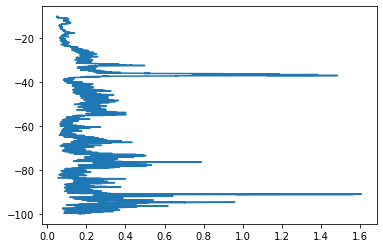

In [14]:
#Threshold for surface and ground
ind =  (df['depth'] < surface) & (df['depth'] > ground)

# Print out a stat
median = df[ind]['value'].median()
print(median)

# plot biz plot the profile vertically.
fig, axes = plt.subplots(1)
axes.plot(df[ind]['value'], df[ind]['depth'])

# add median force and location to a dataframe
to_add_df['geom'] = df['geom'].unique() # Which should only be one location
to_add_df['med_force'] = median
print(to_add_df)

In [15]:
final_df = final_df.append(to_add_df)
print(final_df)

   med_force                            geom
0      0.238  POINT (743905.753 4322634.104)
0      0.260  POINT (742606.052 4322880.455)
0      0.170  POINT (743882.322 4324478.339)


new line test